# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

applicaare il teorema di fluttuazione e dissipazione: i gdl naturali vengono svelati facendo vibrare il sistema.
bisogna usare la madia dell'hamiltoniana

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

calcolo come fluttuazione quadratica della magnetizzazione

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

        h è il campo magnetico.
nel 3 e 4 il - ... è zero

usare blocchi grandi!

4 figure: ogni plot in funzione del tempo farlo per una decina di temperature per ogn'una  fare con gibbs e con metropoli

EQUILIBRATION ESTIMATION!

In [8]:

#variable
teo_p = []
T = np.linspace(0.5,2.0,100)
beta = 1/T
b = beta
J = 1.0
Ns = 50

#Energy
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
teo_p.append(e)

#Heat
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
teo_p.append(heat)

#Magnetization
h =0.02
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
teo_p.append(M)

#susciettibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
teo_p.append(X)

In [23]:
T

array([0.5       , 0.51515152, 0.53030303, 0.54545455, 0.56060606,
       0.57575758, 0.59090909, 0.60606061, 0.62121212, 0.63636364,
       0.65151515, 0.66666667, 0.68181818, 0.6969697 , 0.71212121,
       0.72727273, 0.74242424, 0.75757576, 0.77272727, 0.78787879,
       0.8030303 , 0.81818182, 0.83333333, 0.84848485, 0.86363636,
       0.87878788, 0.89393939, 0.90909091, 0.92424242, 0.93939394,
       0.95454545, 0.96969697, 0.98484848, 1.        , 1.01515152,
       1.03030303, 1.04545455, 1.06060606, 1.07575758, 1.09090909,
       1.10606061, 1.12121212, 1.13636364, 1.15151515, 1.16666667,
       1.18181818, 1.1969697 , 1.21212121, 1.22727273, 1.24242424,
       1.25757576, 1.27272727, 1.28787879, 1.3030303 , 1.31818182,
       1.33333333, 1.34848485, 1.36363636, 1.37878788, 1.39393939,
       1.40909091, 1.42424242, 1.43939394, 1.45454545, 1.46969697,
       1.48484848, 1.5       , 1.51515152, 1.53030303, 1.54545455,
       1.56060606, 1.57575758, 1.59090909, 1.60606061, 1.62121

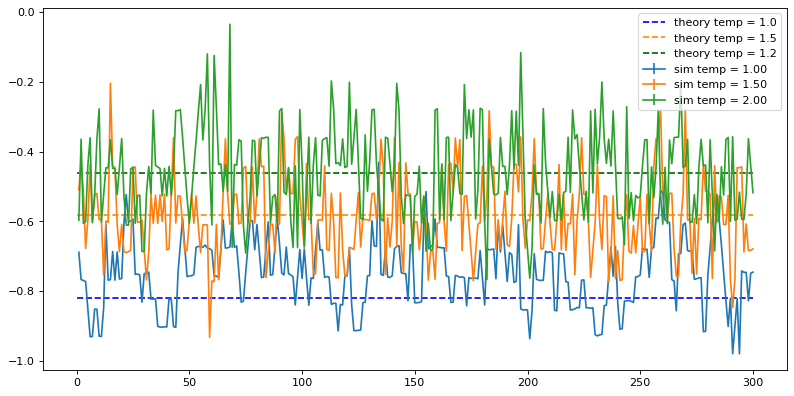

In [9]:
plt.figure(figsize=(12, 6), dpi=80)
for t in ("1.00", "1.50", "2.00"):
    #plt.title(f'{labels[count]}')
    x_eq,s_eq,err_eq = np.loadtxt(f"./data/outputEq_ene_1_{t}.dat", usecols=(0,1,2), unpack='true')       
    plt.errorbar(x_eq,s_eq,yerr = err_eq,label=f"sim temp = {t}")
plt.hlines(e[24],0,300,linestyle='--',color ="blue",label="theory temp = 1.0")
plt.hlines(e[66],0,300,linestyle='--',color ="darkorange",label="theory temp = 1.5")
plt.hlines(e[-1],0,300,linestyle='--',color ="darkgreen",label="theory temp = 1.2")
plt.legend()

The measured energy reaches the equilibrium value in less than 300 steps. Equilibrating the system is completely irrelevant in the final result of the simulations.

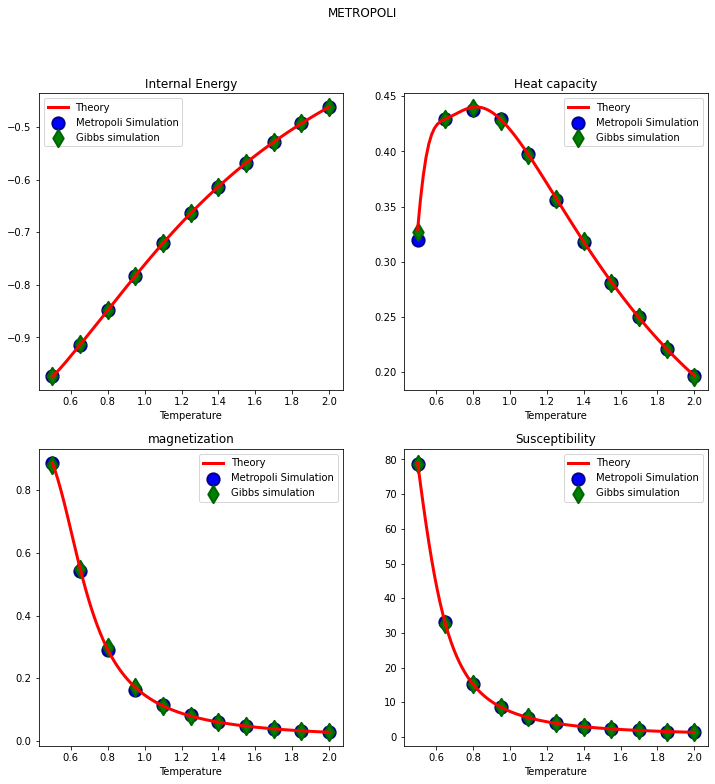

In [10]:

file_name =["ene","heat","mag","chi"]
labels = ["Internal Energy","Heat capacity","magnetization","Susceptibility"]
h_list = [0,0,0.02,0]
fig, axs = plt.subplots(2, 2,figsize=(12,12))

#METROPOLI GRAPHS
x = []; s = []; err = []
for i in range(4):
    xt,st,errt = np.loadtxt(f"./data/output_{file_name[i]}_{h_list[i]}_0.dat", usecols=(0,1,2), unpack='true')
    s.append(st)
    err.append(errt)
    x.append(xt)
    
count = 0
for ax in axs:
    for a in ax:
        a.plot(T, teo_p[count],c='r',linewidth = 3,label="Theory")
        a.scatter(x[count],s[count],label="Metropoli Simulation",marker = 'o',s=150,c = "blue",linewidths=2, edgecolors="darkblue")#,yerr=err[count]
        a.set_title(f'{labels[count]}')
        a.set_xlabel('Temperature')
        count = count+1
        
#GIBBS GRAPHS
x = []; s = []; err = []
for i in range(4):
    xt,st,errt = np.loadtxt(f"../dati/es6/output_{file_name[i]}_{h_list[i]}_1.dat", usecols=(0,1,2), unpack='true')
    s.append(st)
    err.append(errt)
    x.append(xt)
    
count = 0
for ax in axs:
    for a in ax:
        a.scatter(x[count],s[count],label="Gibbs simulation",marker = 'd',s=150,c = "green",linewidths=2, edgecolors="darkgreen")#,yerr=err[count]
        a.set_title(f'{labels[count]}')
        a.set_xlabel('Temperature')
        a.legend()
        count = count+1
#ax_t.hlines(0.8,0,50,color ="red",label="theory")
fig.suptitle('METROPOLI')

plt.show()

In [ ]:
teo_p

In [13]:
#variable
start = 3
teo_p = []
T = np.linspace(0.5,2.0,11)
T= T[start:]
beta = 1/T

#Energy
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
teo_p.append(e)

#Heat
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
teo_p.append(heat)

#Magnetization
h =0.02
b = beta
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
teo_p.append(M)

#susciettibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
teo_p.append(X)

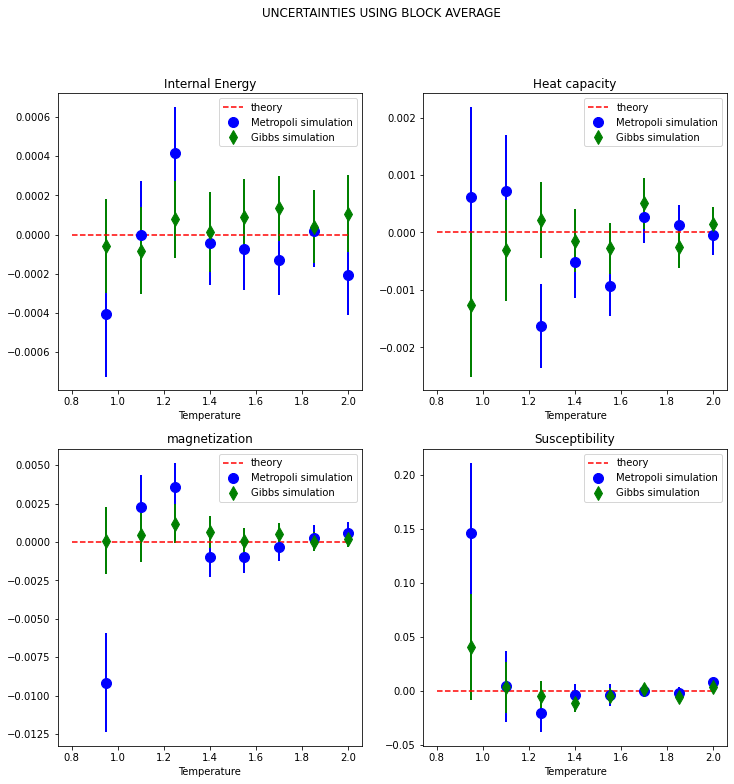

In [14]:
fig, axs = plt.subplots(2, 2,figsize=(12,12))

#METROPOLI GRAPHS
x = []; s = []; err = []
for i in range(4):
    xt,st,errt = np.loadtxt(f"./data/output_{file_name[i]}_{h_list[i]}_0.dat", usecols=(0,1,2), unpack='true')
    s.append(st[start:])
    err.append(errt[start:])
    x.append(xt[start:])
    
count = 0
for ax in axs:
    for a in ax:
        #a.plot(T, teo_p[count],c='r',linewidth = 3,label="Theory")
        a.errorbar(x[count],s[count]-teo_p[count],label="Metropoli simulation",yerr=err[count],color='blue',linestyle="",linewidth=2, marker="o" ,markersize=10)
        a.set_title(f'{labels[count]}')
        a.set_xlabel('Temperature')
        count = count+1
        
#GIBBS GRAPHS
x = []; s = []; err = []
for i in range(4):
    xt,st,errt = np.loadtxt(f"./data/output_{file_name[i]}_{h_list[i]}_1.dat", usecols=(0,1,2), unpack='true')
    s.append(st[start:])
    err.append(errt[start:])
    x.append(xt[start:])
    
count = 0
for ax in axs:
    for a in ax:
        a.errorbar(x[count],s[count]-teo_p[count],label="Gibbs simulation",yerr=err[count],color='green',linestyle="",linewidth=2, marker="d" ,markersize=10)
        a.set_title(f'{labels[count]}')
        a.set_xlabel('Temperature')
        a.hlines(0,0.8,2,linestyle='--',color ="red",label="theory")
        a.legend()
        count = count+1

fig.suptitle('UNCERTAINTIES USING BLOCK AVERAGE')

plt.show()